In [18]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import deepxde as dde

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


import os
print(os.environ['PATH'])

print(dde.backend.backend.is_gpu_available())


Num GPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3239036213853824529
xla_global_id: -1
]
F:\AnacondaCode\envs\deepxde2;F:\AnacondaCode\envs\deepxde2\Library\mingw-w64\bin;F:\AnacondaCode\envs\deepxde2\Library\usr\bin;F:\AnacondaCode\envs\deepxde2\Library\bin;F:\AnacondaCode\envs\deepxde2\Scripts;F:\AnacondaCode\envs\deepxde2\bin;F:\AnacondaCode\condabin;F:\AnacondaCode;F:\AnacondaCode\Library\mingw-w64\bin;F:\AnacondaCode\Library\usr\bin;F:\AnacondaCode\Library\bin;F:\AnacondaCode\Scripts;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.2\libnvvp;.;.;.;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32

In [6]:
import numpy as np
import tensorflow as tf
import deepxde as dde


# Define the geometry and time domain
geom = dde.geometry.Interval(0, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

# Define the heat equation
def heat_eqn(x, u):
    du_t = dde.grad.jacobian(u, x, i=0, j=1)
    du_xx = dde.grad.hessian(u, x, i=1, j=1)
    return du_t - du_xx

# Define the boundary condition
def boundary_l(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0)

def boundary_r(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1)

def func(x):
    return np.sin(np.pi * x[:, 1:2])

bc_l = dde.DirichletBC(geomtime, func, boundary_l, component=0)
bc_r = dde.DirichletBC(geomtime, func, boundary_r, component=0)

# Define the initial condition
ic = dde.IC(geomtime, func, lambda _, on_initial: on_initial)

# Gather all components of the model
data = dde.data.TimePDE(
    geomtime,
    heat_eqn,
    [bc_l, bc_r, ic],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

# Compile and train the model
model.compile("adam", lr=0.001)
model.train(epochs=5000)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.149394 s



F:\AnacondaCode\envs\deepxde2\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.501156 s

Training model...

Step      Train loss                                  Test loss                                   Test metric
0         [1.68e-01, 3.02e-01, 2.83e-01, 8.32e-04]    [1.69e-01, 3.02e-01, 2.83e-01, 8.32e-04]    []  


KeyboardInterrupt: 

In [10]:
!jupyter labextension install jupyterlab-plotly

An error occurred.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\Himendra\AppData\Local\Temp\jupyterlab-debug-w3v5x38x.log


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.171995 s

Tensor("mul:0", shape=(None, 1), dtype=float32)


F:\AnacondaCode\envs\deepxde2\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


Tensor("mul_3:0", shape=(None, 1), dtype=float32)
'compile' took 1.309680 s

Training model...

Step      Train loss                                            Test loss                                             Test metric
0         [1.54e+10, 9.09e-05, 1.31e-05, 7.17e-02, 1.52e-02]    [1.54e+10, 9.09e-05, 1.31e-05, 7.17e-02, 1.52e-02]    []  
1000      [5.35e+02, 3.89e-09, 6.23e-13, 7.05e-02, 4.54e-06]    [5.35e+02, 3.89e-09, 6.23e-13, 7.05e-02, 4.54e-06]    []  
2000      [5.36e+02, 3.89e-09, 6.23e-13, 7.05e-02, 4.54e-06]    [5.36e+02, 3.89e-09, 6.23e-13, 7.05e-02, 4.54e-06]    []  
3000      [5.36e+02, 3.90e-09, 6.24e-13, 7.05e-02, 4.54e-06]    [5.36e+02, 3.90e-09, 6.24e-13, 7.05e-02, 4.54e-06]    []  
4000      [5.35e+02, 3.91e-09, 6.22e-13, 7.05e-02, 4.56e-06]    [5.35e+02, 3.91e-09, 6.22e-13, 7.05e-02, 4.56e-06]    []  
5000      [7.08e+05, 1.05e-08, 4.82e-09, 7.04e-02, 4.11e-05]    [7.08e+05, 1.05e-08, 4.82e-09, 7.04e-02, 4.11e-05]    []  
6000      [7.03e+05, 1.04e-08, 4.78e

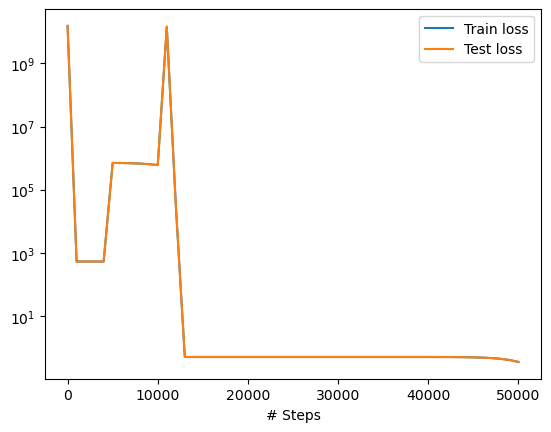

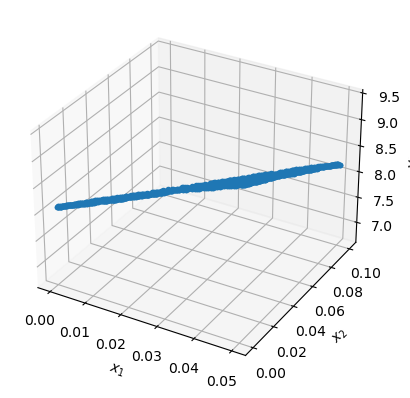

In [3]:
#simple rheometer flow

"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax"""
import deepxde as dde
import numpy as np
import matplotlib as plt
import numpy as np
import tensorflow as tf
#from deepxde.backend import tfhelper
#from deepxde.boundarycondition import BC



#Import BC at some point

#viscosity initial guess
eta =  dde.Variable(1.0)

#########################
#some properties of system
#radius in meters
R = 0.050 #5 cm
#height in meteres
H = 0.1 #1 mm
Lx_min = 0.0001
Lx_max = R
Ly_min = 0.0001
Ly_max = H
AngularVelocity = 10

def initial_guess(x):
    r = x[:, 0:1]
    z = x[:, 1:2]
    # Linear interpolation between velocity at z = 0 (increasing with r) and z = H (0 velocity)
    V = AngularVelocity*r * (1 - z/H)
    return V

#########################
#make domain
#our domain is pseudo steady state, time invariant. Axisymmetric wrt theta
#geom = dde.geometry.Rectangle([0, 0], [R, H])


#define our sysyem?
#x represents r,z, y represents theta
def rheometerPlate(x,y):
    Vdtheta =  y[:, 0:1]
    r = x[:,0:1]
    z = x[:,1:2]


    mult_Vtheta_r = Vdtheta*r
    print(mult_Vtheta_r)
    dVtheta_r = dde.grad.jacobian(mult_Vtheta_r, x, i=0) 

    Vtheta_rdiv =  dVtheta_r/(r)
    dVtheta_r_r = dde.grad.jacobian(Vtheta_rdiv, x, i=0) 
    dVtheta_zz = dde.grad.hessian(Vdtheta,x,i=1, j = 1)



     # calculate dV/dx
    #V_x = tf.gradients(V, x1)[0]  

    # calculate d/dx(1/x*dV/dx)
    # term = tf.gradients((1 / x1) * V_x, x1)[0]
    #we have indep variables t, theta and z, we have dep variabels theta. We have first order and second order things

    #eqn = ()
    return eta*(dVtheta_r_r+dVtheta_zz)
    #return (eta*dVtheta_zz)
    #return (eta*dVtheta_r_r)



space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])

def boundary(_, on_initial):
    return on_initial

#ic1 = dde.icbc.IC(geom, lambda X: 1, boundary, component=0)


def topplate(x, on_boundary):
    return on_boundary and np.isclose(x[1], Ly_max)

def func(x):
    return x[:, 0:1]  # for example

def boundary2(x, on_boundary):
    return on_boundary and np.isclose(x[0],Lx_min)
def boundary3(x, on_boundary):
    return on_boundary and np.isclose(x[1], Ly_min)    
def boundary4(x, on_boundary):
    return on_boundary and np.isclose(x[0], Lx_max)    

#Top plate, needs to be velocity =0
bc = dde.DirichletBC(space_domain, lambda x: 0, topplate)

#center, velocity is 0
bc2 = dde.DirichletBC(space_domain, lambda x: 0, boundary2)
#swithc to neumann
#bc2 = dde.NeumannBC(space_domain, lambda x: 0, boundary2)



#bottom plate, velocity moves with angfular velocity
bc3 = dde.DirichletBC(space_domain, lambda x: AngularVelocity*x[0], boundary3)
#bc3 = dde.DirichletBC(space_domain, lambda x: 0, boundary3)

#edge, slip
bc4 = dde.NeumannBC(space_domain, lambda x: 0, boundary4)


data = dde.data.PDE(
    space_domain,
    rheometerPlate,
    [bc, bc2, bc3, bc4],
    num_domain=200,
    num_boundary=500
    #auxiliary_var_function=ex_func2,
)



net = dde.nn.FNN([2] + [80] * 6 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

external_trainable_variables = []
variable = dde.callbacks.VariableValue(
    external_trainable_variables, period=200, filename="variables.dat"
)

# train adam
model.compile(
    "adam", lr=0.01, external_trainable_variables=external_trainable_variables
)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

# train lbfgs
#model.compile("L-BFGS", external_trainable_variables=external_trainable_variables)
#losshistory, train_state = model.train(callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)





Training model...

Step      Train loss                                            Test loss                                             Test metric
104266    [0.00e+00, 2.25e-03, 2.25e-03, 5.49e-02, 1.43e-23]    [0.00e+00, 2.25e-03, 2.25e-03, 5.49e-02, 1.43e-23]    []  
105000    [0.00e+00, 3.93e-03, 3.93e-03, 5.08e-02, 1.24e-23]    [0.00e+00, 3.93e-03, 3.93e-03, 5.08e-02, 1.24e-23]    []  
105266    [0.00e+00, 3.93e-03, 3.93e-03, 5.08e-02, 1.07e-23]    [0.00e+00, 3.93e-03, 3.93e-03, 5.08e-02, 1.07e-23]    []  

Best model at step 67000:
  train loss: 5.48e-02
  test loss: 5.48e-02
  test metric: []

'train' took 72.100878 s

Saving loss history to C:\Users\Himendra\Documents\Code\ConfocalImageAnalysis\Co2-HighpressureRHEO\loss.dat ...
Saving training data to C:\Users\Himendra\Documents\Code\ConfocalImageAnalysis\Co2-HighpressureRHEO\train.dat ...
Saving test data to C:\Users\Himendra\Documents\Code\ConfocalImageAnalysis\Co2-HighpressureRHEO\test.dat ...


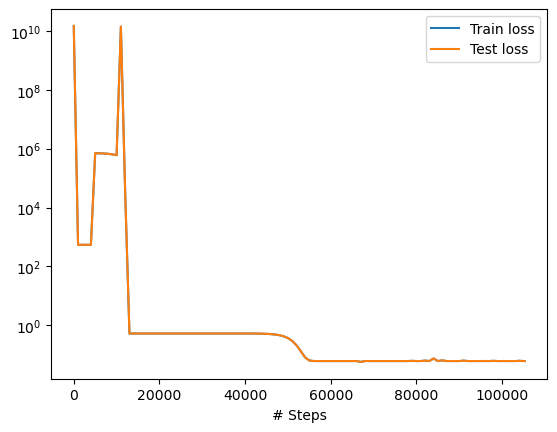

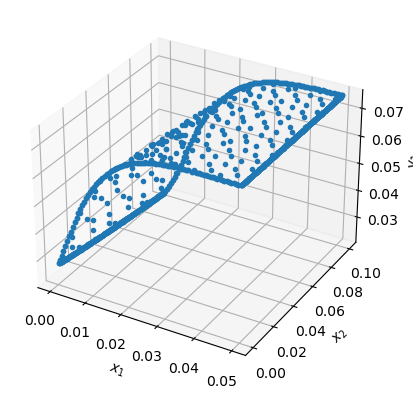

In [16]:


# Continue training
losshistory, train_state = model.train(iterations=1000, callbacks=[variable])
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

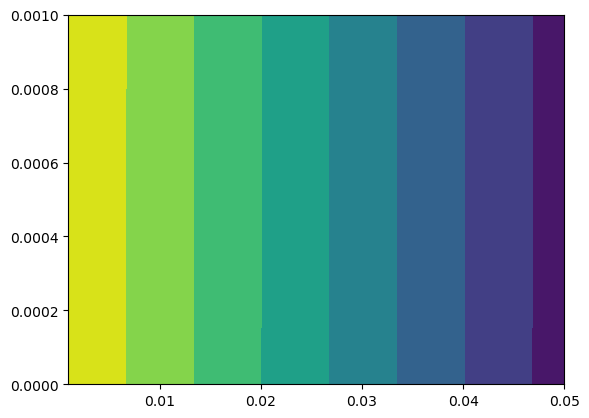

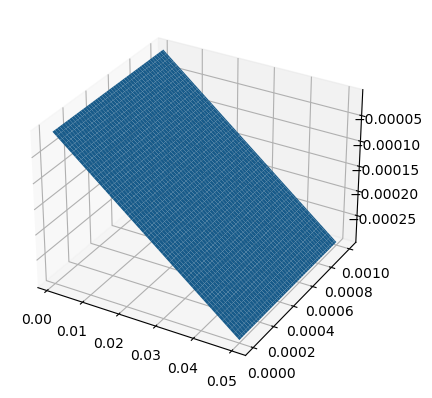

In [10]:
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default='notebook'

#lets see the model
#[pr,pz,pV] = load_training_data(num=140000)
rnew = np.linspace(Lx_min, Lx_max,100)
znew = np.linspace(Ly_min, Ly_max,100)

# Generate a grid of (r, z) pairs
rnew, znew = np.meshgrid(rnew, znew)
rz_pred = np.vstack([rnew.ravel(), znew.ravel()]).T


#PredictedGeometry = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])
PredictedOutcome = model.predict(rz_pred)

# reshape the predicted outcomes into the same shape as your rnew and znew grids
predicted_outcome_reshaped = PredictedOutcome.reshape(rnew.shape)

# create a 2D contour plot
plt.contourf(rnew, znew, predicted_outcome_reshaped)

# or, for a 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(rnew, znew, predicted_outcome_reshaped)

plt.show()


import plotly.graph_objects as go

# create a 3D surface plot with Plotly
fig = go.Figure(data=[go.Surface(z=predicted_outcome_reshaped, x=rnew, y=znew)])

fig.update_layout(title='Predicted Outcome', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

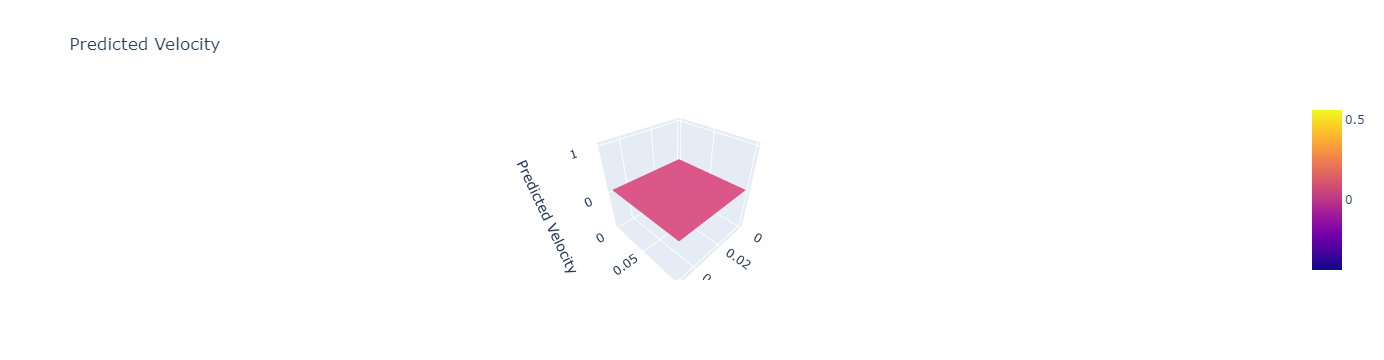

In [11]:
import numpy as np
import plotly.graph_objects as go
import plotly.offline as py

# Initialize Plotly for Jupyter Notebook
py.init_notebook_mode(connected=True)

# Generate new (r, z) pairs
rnew = np.linspace(Lx_min, Lx_max,100)
znew = np.linspace(Ly_min, Ly_max,100)

# Generate a grid of (r, z) pairs
rnew, znew = np.meshgrid(rnew, znew)
rz_pred = np.vstack([rnew.ravel(), znew.ravel()]).T

# Get the model prediction
PredictedOutcome = model.predict(rz_pred)

# reshape the predicted outcomes into the same shape as your rnew and znew grids
predicted_outcome_reshaped = PredictedOutcome.reshape(rnew.shape)

# Define the surface
surface = go.Surface(x=rnew, y=znew, z=predicted_outcome_reshaped)

# Package the trace inside a data object
data = [surface]

# Define layout options
layout = go.Layout(
    title='Predicted Velocity',
    scene=dict(
        xaxis=dict(
            title='r',
        ),
        yaxis=dict(
            title='z',
        ),
        zaxis=dict(
            title='Predicted Velocity',
        ),
    )
)

# Define the figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
py.iplot(fig)

In [4]:
#simple rheometer flow
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax"""
import deepxde as dde
import numpy as np
import matplotlib as plt
import numpy as np
import tensorflow as tf
from deepxde.backend import tfhelper
from deepxde.boundarycondition import BC

class IntegralBC(BC):
    def __init__(self, geom, func, on_boundary, quad_deg=20):
        super(IntegralBC, self).__init__(geom, on_boundary)
        self.func = func

        # Set up Gauss-Legendre quadrature
        quad_x, quad_w = np.polynomial.legendre.leggauss(quad_deg)
        # Map quadrature points and weights from [-1,1] to [0,1]
        self.quad_pts = 0.5 * (quad_x + 1)
        self.quad_wts = 0.5 * quad_w

    def error(self, X, y, outputs):
        quad_error = 0
        for x, w in zip(self.quad_pts, self.quad_wts):
            X_quad = X * (1 - x) + self.geom.boundary_points() * x
            y_quad = self.func(X_quad)
            quad_error += w * tfhelper.square(y_quad - outputs)
        return quad_error









#Import BC at some point

#viscosity initial guess
eta =  dde.Variable(5.0)

#########################
#some properties of system
#radius in meters
R = 0.050 #5 cm
#height in meteres
H = 0.001 #1 mm





#########################
#make domain
#our domain is pseudo steady state, time invariant. Axisymmetric wrt theta
geom = dde.geometry.Rectangle([0, 0], [R, H])


#define our sysyem?
#x represents r,z, y represents theta
def rheometerPlate(x,y)
    dtheta =  y[:, 0:1]
    r = x[:,0:1]
    z = x[:,1:2]
    
    
    
    
    dtheta_r = dde.grad.jacobian(dtheta*r, x, i=0) 
    dtheta_r_r = dde.grad.jacobian(dtheta_r*(1/r), x, i=0) 
    dtheta_zz = dde.grad.hessian(dtheta,x,i=1, j = 1)
    
    
    
     # calculate dV/dx
    #V_x = tf.gradients(V, x1)[0]  

    # calculate d/dx(1/x*dV/dx)
    # term = tf.gradients((1 / x1) * V_x, x1)[0]
    #we have indep variables t, theta and z, we have dep variabels theta. We have first order and second order things
    
    eqn = eta*(dtheta_r_r+dtheta_zz)
    return eqn


space_domain = dde.geometry.Rectangle([Lx_min, Ly_min], [Lx_max, Ly_max])

def boundary(_, on_initial):
    return on_initial

ic1 = dde.icbc.IC(geom, lambda X: 1, boundary, component=0)

def gen_traindata():
    #get from test file
    data = np.load("dataset/Lorenz.npz")
    return data["t"], data["y"]

def boundary(x, on_boundary):
    return on_boundary and np.isclose(x[1], Ly_min)

def func(x):
    return x[:, 0:1]  # for example

def boundary2(x, on_boundary):
    return on_boundary and np.isclose(x[0], Lx_min)
def boundary3(x, on_boundary):
    return on_boundary and np.isclose(x[1], Ly_max)    

# Get the train data
observe_t, ob_y = gen_traindata()
#observe_y0 = dde.icbc.PointSetBC(observe_t, ob_y[:, 0:1], component=0)
#observe_y1 = dde.icbc.PointSetBC(observe_t, ob_y[:, 1:2], component=1)
#observe_y2 = dde.icbc.PointSetBC(observe_t, ob_y[:, 2:3], component=2)

bc = dde.DirichletBC(geom, lambda x: 0, boundary)
bc2 = dde.DirichletBC(geom, lambda x: 0, boundary2)
bc3 = IntegralBC(geom, func, boundary3)

Compiling model...
'compile' took 0.000159 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [6.91e-01, 3.12e-01, 1.69e+00, 6.40e+01, 4.90e+01, 7.29e+02, 3.09e+01, 4.27e+01, 2.40e+02]    [6.91e-01, 3.12e-01, 1.69e+00, 6.40e+01, 4.90e+01, 7.29e+02, 3.09e+01, 4.27e+01, 2.40e+02]    []  
1000      [4.99e+00, 3.36e+00, 3.78e+00, 3.32e+01, 5.45e-03, 1.66e+00, 3.29e+01, 7.32e+00, 1.10e+01]    [4.99e+00, 3.36e+00, 3.78e+00, 3.32e+01, 5.45e-03, 1.66e+00, 3.29e+01, 7.32e+00, 1.10e+01]    []  
2000      [8.95e+00, 1.94e+00, 1.28e+00, 1.59e+01, 3.32e-01, 1.53e+00, 3.28e+01, 1.69e+01, 3.82e+00]    [8.95e+00, 1.94e+00, 1.28e+00, 1.59e+01, 3.32e-01, 1.53e+00, 3.28e+01, 1.69e+01, 3.82e+00]    []  
3000      [8.53e+00, 1.96e+00, 8.74e-01, 1.28e+01, 3.94e-01, 1.45e+00, 3.29e+01, 1.94e+01, 2.62e+00]    [8.53e+00, 1

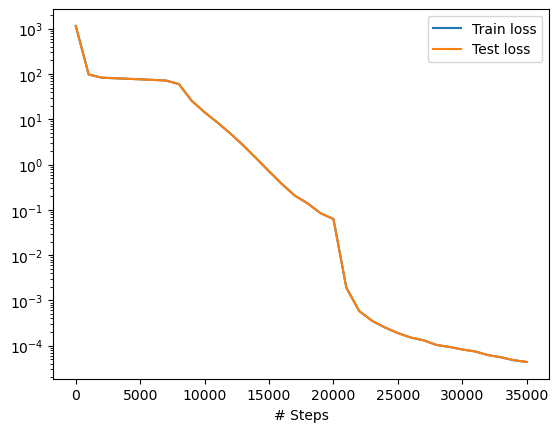

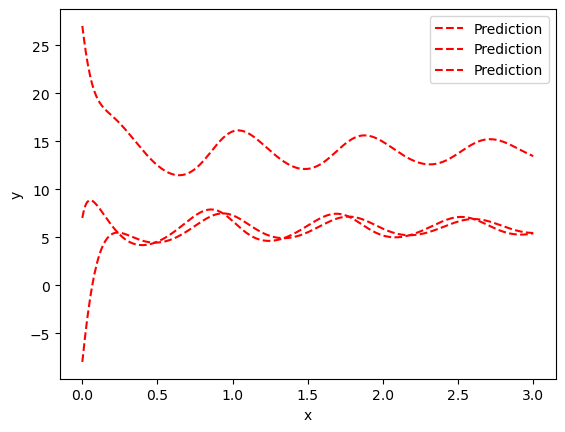

In [4]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax"""
import deepxde as dde
import numpy as np
import matplotlib as plt


def gen_traindata():
    data = np.load("./Lorenz.npz")
    return data["t"], data["y"]


C1 = dde.Variable(1.0)
C2 = dde.Variable(1.0)
C3 = dde.Variable(1.0)

# Most backends
def Lorenz_system(x, y):
    """Lorenz system.
    dy1/dx = 10 * (y2 - y1)
    dy2/dx = y1 * (15 - y3) - y2
    dy3/dx = y1 * y2 - 8/3 * y3
    """
    y1, y2, y3 = y[:, 0:1], y[:, 1:2], y[:, 2:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    dy3_x = dde.grad.jacobian(y, x, i=2)
    return [
        dy1_x - C1 * (y2 - y1),
        dy2_x - y1 * (C2 - y3) + y2,
        dy3_x - y1 * y2 + C3 * y3,
    ]


# Backend JAX
# def Lorenz_system(x, y, unknowns=[C1, C2, C3]):
#     C1, C2, C3 = unknowns
#     y_val, y_fn = y
#     y1, y2, y3 = y_val[:, 0:1], y_val[:, 1:2], y_val[:, 2:3]
#     dy1_x, _ = dde.grad.jacobian(y, x, i=0)
#     dy2_x, _ = dde.grad.jacobian(y, x, i=1)
#     dy3_x, _ = dde.grad.jacobian(y, x, i=2)
#     return [
#         dy1_x - C1 * (y2 - y1),
#         dy2_x - y1 * (C2 - y3) + y2,
#         dy3_x - y1 * y2 + C3 * y3,
#     ]


def boundary(_, on_initial):
    return on_initial


geom = dde.geometry.TimeDomain(0, 3)

# Initial conditions
ic1 = dde.icbc.IC(geom, lambda X: -8, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda X: 7, boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda X: 27, boundary, component=2)

# Get the train data
observe_t, ob_y = gen_traindata()
observe_y0 = dde.icbc.PointSetBC(observe_t, ob_y[:, 0:1], component=0)
observe_y1 = dde.icbc.PointSetBC(observe_t, ob_y[:, 1:2], component=1)
observe_y2 = dde.icbc.PointSetBC(observe_t, ob_y[:, 2:3], component=2)

data = dde.data.PDE(
    geom,
    Lorenz_system,
    [ic1, ic2, ic3, observe_y0, observe_y1, observe_y2],
    num_domain=400,
    num_boundary=2,
    anchors=observe_t,
)

net = dde.nn.FNN([1] + [40] * 3 + [3], "tanh", "Glorot uniform")
model = dde.Model(data, net)

external_trainable_variables = [C1, C2, C3]
variable = dde.callbacks.VariableValue(
    external_trainable_variables, period=600, filename="variables.dat"
)

# train adam
model.compile(
    "adam", lr=0.001, external_trainable_variables=external_trainable_variables
)
losshistory, train_state = model.train(iterations=20000, callbacks=[variable])

# train lbfgs
model.compile("L-BFGS", external_trainable_variables=external_trainable_variables)
losshistory, train_state = model.train(callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

ValueError: Argument Z must be 2-dimensional.

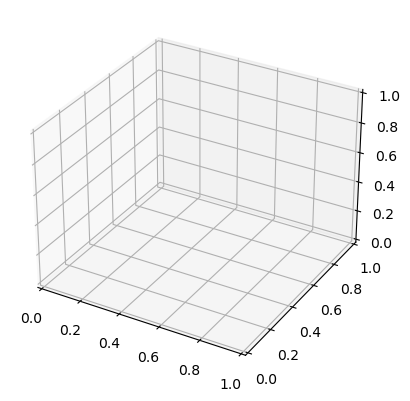

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the radius and height
R = 5
H = 10

# Set the number of points
points = 100

# Create the vectors for r, theta, and z
r = np.linspace(0, R, points)
theta = np.linspace(0, 2.*np.pi, points)
z = np.linspace(0, H, points)

# Create a 2D grid for r and theta
r, theta = np.meshgrid(r, theta)

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)
z = z

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()